### Load and read the data

In [10]:
import pandas as pd
position_data = pd.read_csv("sub_data_file_with_header.CSV") # load csv file you can use sub_data_file_with_header or you can add the header by yourself
position_data.head(10)

,No.,x,y
0,1,4873.60,4886.70
1,2,-3295.70,-4330.50
2,3,-2407.10,4397.40
3,4,-1027.00,-4828.90
4,5,-4260.10,1838.40
5,6,1841.00,2837.40
6,7,-973.92,336.69
7,8,4826.00,3853.00
8,9,-978.16,3990.00
9,10,1198.00,1258.20


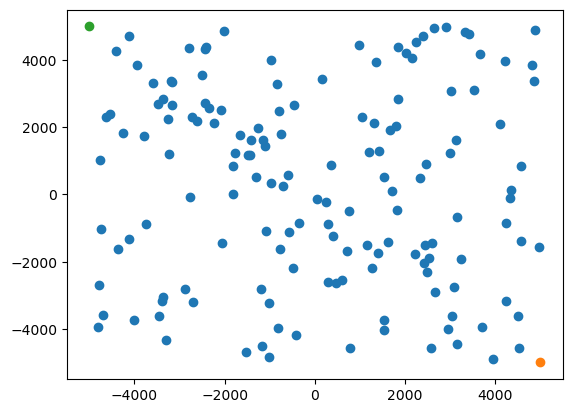

In [11]:
import matplotlib.pyplot as plt
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

plt.scatter(coordinate_x, coordinate_y) 

BS_1_x = 5000
BS_1_y = -5000
BS_2_x = -5000
BS_2_y = 5000
plt.scatter(BS_1_x, BS_1_y) 
plt.scatter(BS_2_x, BS_2_y) 
plt.show()
#print(coordinate_x)
#print(coordinate_y)

#print(len(coordinate_x))

### Calculate the distance (note that you also need to incude the base station)

In [21]:
# Calculating the disctance between a pair of car
import math
import numpy as np

#print(coordinate_x)
#print(coordinate_y)
# calculate the distance between car i and car j
dis_node_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
rate_node_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
for i in range(len(coordinate_x)):  
    for j in range(len(coordinate_x)):
        dis_node_ij[i][j] = math.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 + (abs(coordinate_y[i] - coordinate_y[j])) ** 2)
        # Here is to calculate the transmission rate according to the distance
        if dis_node_ij[i][j] < 500:
            rate_node_ij[i][j] = 7
        elif dis_node_ij[i][j] >= 500 and dis_car_ij[i][j] < 1000:
            rate_node_ij[i][j] = 5
        elif dis_node_ij[i][j] >= 1000 and dis_car_ij[i][j] < 1500:
            rate_node_ij[i][j] = 4
        elif dis_node_ij[i][j] >= 1500 and dis_car_ij[i][j] < 2000:
            rate_node_ij[i][j] = 3
        elif dis_node_ij[i][j] >= 2000 and dis_car_ij[i][j] < 2500:
            rate_node_ij[i][j] = 2
        elif dis_node_ij[i][j] >= 2500 and dis_car_ij[i][j] < 3000:
            rate_node_ij[i][j] = 1
        elif dis_node_ij[i][j] >= 3000:
            rate_node_ij[i][j] = 0
        

        
print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in dis_node_ij]))   

print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in rate_node_ij])) 

# please think about how to define a subfunction for calculating distance, becasue you may call it many times.

 0.0   12316.421490433007   7297.123198905169   11367.056070944665   9628.946389922421   3660.0947050588734   7409.188967120491   1034.7953662439738   5920.0646945451535   5164.886021007627   11906.85928404296   9805.552901290166   11549.984687435737   9742.076190422655   8893.603630699987   7368.7049778098735   3063.30171710199   9395.543774577392   7359.25481095063   1552.523751831192   3922.440120639192   7234.532362219413   6880.709947381884   5774.988112204215   8625.350907041406   7097.0924363432105   8580.518371223268   7357.3271736412535   6419.994008758887   7241.26769291814   10377.406756391503   10374.263086118453   7351.179052369763   7828.292370427921   5497.246420063412   4062.3955519003807   4787.271671850262   10494.396995902147   7948.1766795913645   2232.7952391565154   6734.066991796265   2475.9777704979506   6850.093273087601   8873.370332066617   6153.396953106471   7769.540938472492   10932.902284389082   12388.866235455125   6992.144318447668   8537.303598912247 

### Ouput solution file as .json file

In [22]:
import json
# Data to be written into the json file
# Here is just an example, not a real optimal routing path
routing_path = {
    "Source Node": "Node-9",
    "Routing Path": '(Node-7, 8), ( Node-4, 6), (Node-8, 2), (BS-1,8)',
    "End-to-end data rate": 2
} 
# Serializing json
json_object = json.dumps(routing_path, indent=2)

In [23]:
# Writing to Routing_paths.json
with open("Optimal_Routing_paths.json", "w") as outfile:
    outfile.write(json_object)
    outfile.write('\n')

In [24]:
# Writing more routing paths to Routing_paths.json
routing_path = {
    "Source Node": "Node-8",
    "Routing Path": '(Node-6, 6), (Node-11, 4), (Node-12, 8), (Node-21,10), (BS-1, 4)',
    "End-to-end data rate": 4
} 
# Serializing json
json_object = json.dumps(routing_path, indent=2)
# Writing to Routing_paths.json
with open("Optimal_Routing_paths.json", "a") as outfile:
    outfile.write(json_object)
    outfile.write('\n')